In [1]:
import pandas as pd
import os

In [2]:
os.listdir()

['TL_IF_SIGL_.csv', 'TL_IF_SIGL_CYCL_.csv', 'view_data.ipynb']

In [3]:
TL_IF_SIGL = pd.read_csv(os.listdir()[0])
TL_IF_SIGL_CYCL = pd.read_csv(os.listdir()[1])

In [4]:
'''
현시 시각
교차로 ID
Ring A 현시 번호
Ring A 이동류 번호
Ring B 현시 번호
Ring B 이동류 번호
저장 시각
'''
TL_IF_SIGL # 신호 운영 이력

PHASE_DT  CRSRD_ID  RINGA_PHASE  RINGA_FLOW  \
0       2024-06-24 17:37:45.000       403            4           1   
1       2024-06-24 17:37:45.000       404            1           1   
2       2024-06-24 17:37:45.000       405            1           1   
3       2024-06-24 17:37:45.000       406            2           1   
4       2024-06-24 17:37:45.000       407            5           1   
...                         ...       ...          ...         ...   
119586  2024-06-26 15:39:41.000       606            1           1   
119587  2024-06-26 15:39:41.000       607            1           1   
119588  2024-06-26 15:39:41.000       608            1           1   
119589  2024-06-26 15:39:41.000       609            1           1   
119590  2024-06-26 15:39:41.000       610            1           1   

        RINGB_PHASE  RINGB_FLOW              FRST_REG_DT  
0                 4           1  2024-06-24 17:37:52.000  
1                 1           1  2024-06-24 17:37:52.000  
2                 1           1  2024-06-24 17:37:52.000  
3                 2           1  2024-06-24 17:37:52.000  
4                 1           1  2024-06-24 17:37:52.000  
...             ...         ...                      ...  
119586            1           1  2024-06-26 15:39:41.000  
119587            1           1  2024-06-26 15:39:41.000  
119588            1           1  2024-06-26 15:39:41.000  
119589            1           1  2024-06-26 15:39:41.000  
119590            1           1  2024-06-26 15:39:41.000  

[119591 rows x 7 columns]

In [5]:
'''
발생시각
교차로 ID
Ring A 1현시 녹색 시간 (1~8)
Ring B 1현시 녹색 시간 (1~8)
저장 시각
'''
TL_IF_SIGL_CYCL # 신호 운영 주기 이력

OCRN_DT  CRSRD_ID  RINGA_PHASE1  RINGA_PHASE2  \
0    2024-06-26 15:48:06.000         8            30            30   
1    2024-06-26 15:48:34.000         5            67            18   
2    2024-06-26 15:48:49.000         2            44            50   
3    2024-06-26 15:49:49.000         7           118            22   
4    2024-06-26 15:50:06.000         8            30            30   
..                       ...       ...           ...           ...   
171  2024-06-26 15:42:42.000         4            45            73   
172  2024-06-26 15:43:03.000         3            85            25   
173  2024-06-26 15:43:09.000         2            44            50   
174  2024-06-26 15:44:51.000         9            20            54   
175  2024-06-26 15:45:10.000         7           117            22   

     RINGA_PHASE3  RINGA_PHASE4  RINGA_PHASE5  RINGA_PHASE6  RINGA_PHASE7  \
0              30            30             0             0             0   
1              18            37             0             0             0   
2              12            30            34             0             0   
3               0             0             0             0             0   
4              30            30             0             0             0   
..            ...           ...           ...           ...           ...   
171            17            35             0             0             0   
172            40            20             0             0             0   
173            12            30            34             0             0   
174            18            18            30             0             0   
175             0             0             0             0             0   

     RINGA_PHASE8  RINGB_PHASE1  RINGB_PHASE2  RINGB_PHASE3  RINGB_PHASE4  \
0               0            30            30            30            30   
1               0            67            18            18            37   
2               0            44            50            12            30   
3               0           118            22             0             0   
4               0            30            30            30            30   
..            ...           ...           ...           ...           ...   
171             0            45            73            17            35   
172             0            85            25            40            20   
173             0            44            50            12            30   
174             0            20            54            18            18   
175             0           117            22             0             0   

     RINGB_PHASE5  RINGB_PHASE6  RINGB_PHASE7  RINGB_PHASE8  \
0               0             0             0             0   
1               0             0             0             0   
2              34             0             0             0   
3               0             0             0             0   
4               0             0             0             0   
..            ...           ...           ...           ...   
171             0             0             0             0   
172             0             0             0             0   
173            34             0             0             0   
174            30             0             0             0   
175             0             0             0             0   

                 FRST_REG_DT  
0    2024-06-26 15:48:05.000  
1    2024-06-26 15:48:34.000  
2    2024-06-26 15:48:48.000  
3    2024-06-26 15:49:49.000  
4    2024-06-26 15:50:06.000  
..                       ...  
171  2024-06-26 15:42:42.000  
172  2024-06-26 15:43:03.000  
173  2024-06-26 15:43:09.000  
174  2024-06-26 15:44:50.000  
175  2024-06-26 15:45:09.000  

[176 rows x 19 columns]

In [6]:
import datetime
secwise = TL_IF_SIGL
secwise['PHASE_DT'] = pd.to_datetime(secwise['PHASE_DT'])
secwise['UNIX'] = secwise['PHASE_DT'].apply(lambda x: int(x.timestamp()))
secwise = secwise.sort_values(by='UNIX')
display(secwise)

PHASE_DT  CRSRD_ID  RINGA_PHASE  RINGA_FLOW  RINGB_PHASE  \
2622   2024-06-24 17:37:41       216            3           1            3   
12097  2024-06-24 17:37:41       676            3           1            3   
12096  2024-06-24 17:37:41       675            4           1            4   
12095  2024-06-24 17:37:41       674            5           1            5   
12094  2024-06-24 17:37:41       673            5           1            5   
...                    ...       ...          ...         ...          ...   
115356 2024-06-26 15:39:42       398            1           1            1   
115357 2024-06-26 15:39:42       399            1           1            1   
115358 2024-06-26 15:39:42       400            1           1            1   
115350 2024-06-26 15:39:42       392            1           1            1   
115354 2024-06-26 15:39:42       396            1           1            1   

        RINGB_FLOW              FRST_REG_DT        UNIX  
2622             1  2024-06-24 17:37:51.000  1719250661  
12097            1  2024-06-24 17:37:53.000  1719250661  
12096            1  2024-06-24 17:37:53.000  1719250661  
12095            1  2024-06-24 17:37:53.000  1719250661  
12094            1  2024-06-24 17:37:53.000  1719250661  
...            ...                      ...         ...  
115356           1  2024-06-26 15:39:42.000  1719416382  
115357           1  2024-06-26 15:39:42.000  1719416382  
115358           1  2024-06-26 15:39:42.000  1719416382  
115350           1  2024-06-26 15:39:42.000  1719416382  
115354           1  2024-06-26 15:39:42.000  1719416382  

[119591 rows x 8 columns]

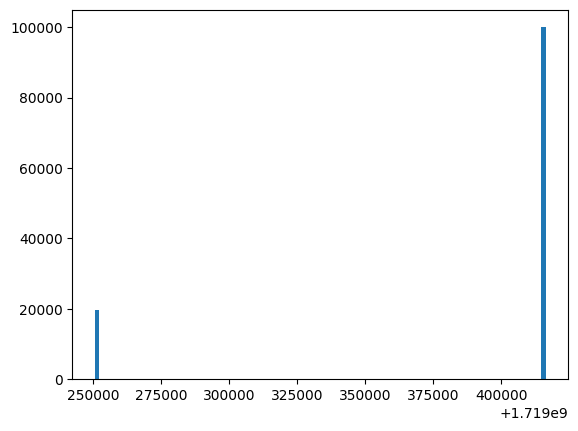

In [7]:
import matplotlib.pyplot as plt
plt.hist(secwise['UNIX'], bins=100)
plt.show()

In [8]:
thres = (secwise['UNIX'].max() + secwise['UNIX'].min()) // 2
secwise_former = secwise[secwise['UNIX'] < thres]
secwise_latter = secwise[secwise['UNIX'] > thres]
print(len(secwise_former))
print(len(secwise_latter))
secwise = secwise_latter
secwise

19593
99998


PHASE_DT  CRSRD_ID  RINGA_PHASE  RINGA_FLOW  RINGB_PHASE  \
21586  2024-06-26 15:37:22       150            1           1            1   
21589  2024-06-26 15:37:22       153            1           1            1   
21590  2024-06-26 15:37:22       154            2           1            2   
21591  2024-06-26 15:37:22       155            1           1            1   
21588  2024-06-26 15:37:22       152            3           1            3   
...                    ...       ...          ...         ...          ...   
115356 2024-06-26 15:39:42       398            1           1            1   
115357 2024-06-26 15:39:42       399            1           1            1   
115358 2024-06-26 15:39:42       400            1           1            1   
115350 2024-06-26 15:39:42       392            1           1            1   
115354 2024-06-26 15:39:42       396            1           1            1   

        RINGB_FLOW              FRST_REG_DT        UNIX  
21586            1  2024-06-26 15:37:22.000  1719416242  
21589            1  2024-06-26 15:37:22.000  1719416242  
21590            1  2024-06-26 15:37:22.000  1719416242  
21591            1  2024-06-26 15:37:22.000  1719416242  
21588            1  2024-06-26 15:37:22.000  1719416242  
...            ...                      ...         ...  
115356           1  2024-06-26 15:39:42.000  1719416382  
115357           1  2024-06-26 15:39:42.000  1719416382  
115358           1  2024-06-26 15:39:42.000  1719416382  
115350           1  2024-06-26 15:39:42.000  1719416382  
115354           1  2024-06-26 15:39:42.000  1719416382  

[99998 rows x 8 columns]

In [9]:
import numpy as np
# 누락된 교차로번호 없음
list(np.sort(secwise['CRSRD_ID'].unique())) == list(range(1, 755))

True

8


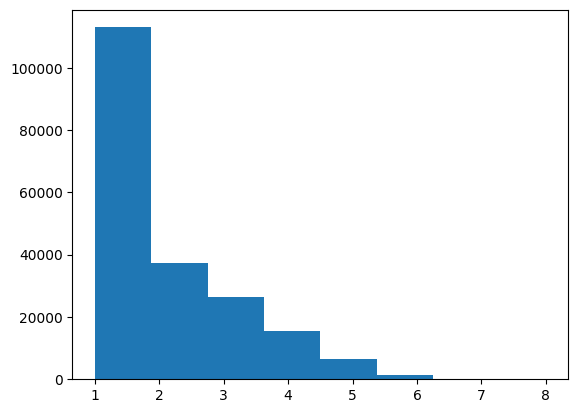

In [10]:
flow_nos = secwise[['RINGA_PHASE', 'RINGB_PHASE']].values.flatten()
print(len(np.unique(flow_nos)))
plt.hist(flow_nos, bins=8)
plt.show()

In [11]:
int_id = 21
secw = secwise[secwise.CRSRD_ID==int_id]
secw[:40].reset_index(drop=True)

PHASE_DT  CRSRD_ID  RINGA_PHASE  RINGA_FLOW  RINGB_PHASE  \
0  2024-06-26 15:37:22        21            6           1            6   
1  2024-06-26 15:37:23        21            6           1            6   
2  2024-06-26 15:37:24        21            6           1            6   
3  2024-06-26 15:37:25        21            6           1            6   
4  2024-06-26 15:37:26        21            6           1            6   
5  2024-06-26 15:37:27        21            6           1            6   
6  2024-06-26 15:37:28        21            1           1            1   
7  2024-06-26 15:37:29        21            1           1            1   
8  2024-06-26 15:37:30        21            1           1            1   
9  2024-06-26 15:37:31        21            1           1            1   
10 2024-06-26 15:37:32        21            1           1            1   
11 2024-06-26 15:37:33        21            1           1            1   
12 2024-06-26 15:37:34        21            1           1            1   
13 2024-06-26 15:37:35        21            1           1            1   
14 2024-06-26 15:37:36        21            1           1            1   
15 2024-06-26 15:37:37        21            1           1            1   
16 2024-06-26 15:37:38        21            1           1            1   
17 2024-06-26 15:37:39        21            1           1            1   
18 2024-06-26 15:37:40        21            1           1            1   
19 2024-06-26 15:37:41        21            1           1            1   
20 2024-06-26 15:37:42        21            1           1            1   
21 2024-06-26 15:37:43        21            1           1            1   
22 2024-06-26 15:37:44        21            1           1            1   
23 2024-06-26 15:37:45        21            1           1            1   
24 2024-06-26 15:37:46        21            1           1            1   
25 2024-06-26 15:37:47        21            1           1            1   
26 2024-06-26 15:37:48        21            1           1            1   
27 2024-06-26 15:37:49        21            1           1            1   
28 2024-06-26 15:37:50        21            2           1            2   
29 2024-06-26 15:37:51        21            2           1            2   
30 2024-06-26 15:37:52        21            2           1            2   
31 2024-06-26 15:37:53        21            2           1            2   
32 2024-06-26 15:37:54        21            2           1            2   
33 2024-06-26 15:37:55        21            2           1            2   
34 2024-06-26 15:37:56        21            2           1            2   
35 2024-06-26 15:37:57        21            2           1            2   
36 2024-06-26 15:37:58        21            2           1            2   
37 2024-06-26 15:37:59        21            2           1            2   
38 2024-06-26 15:38:00        21            2           1            2   
39 2024-06-26 15:38:01        21            2           1            2   

    RINGB_FLOW              FRST_REG_DT        UNIX  
0            1  2024-06-26 15:37:22.000  1719416242  
1            1  2024-06-26 15:37:23.000  1719416243  
2            1  2024-06-26 15:37:23.000  1719416244  
3            1  2024-06-26 15:37:24.000  1719416245  
4            1  2024-06-26 15:37:25.000  1719416246  
5            1  2024-06-26 15:37:26.000  1719416247  
6            1  2024-06-26 15:37:27.000  1719416248  
7            1  2024-06-26 15:37:28.000  1719416249  
8            1  2024-06-26 15:37:29.000  1719416250  
9            1  2024-06-26 15:37:30.000  1719416251  
10           1  2024-06-26 15:37:31.000  1719416252  
11           1  2024-06-26 15:37:32.000  1719416253  
12           1  2024-06-26 15:37:33.000  1719416254  
13           1  2024-06-26 15:37:34.000  1719416255  
14           1  2024-06-26 15:37:35.000  1719416256  
15           1  2024-06-26 15:37:36.000  1719416257  
16           1  2024-06-26 15:37:37.000  1719416258  
17     

In [12]:
cclwise = TL_IF_SIGL_CYCL
cclwise

OCRN_DT  CRSRD_ID  RINGA_PHASE1  RINGA_PHASE2  \
0    2024-06-26 15:48:06.000         8            30            30   
1    2024-06-26 15:48:34.000         5            67            18   
2    2024-06-26 15:48:49.000         2            44            50   
3    2024-06-26 15:49:49.000         7           118            22   
4    2024-06-26 15:50:06.000         8            30            30   
..                       ...       ...           ...           ...   
171  2024-06-26 15:42:42.000         4            45            73   
172  2024-06-26 15:43:03.000         3            85            25   
173  2024-06-26 15:43:09.000         2            44            50   
174  2024-06-26 15:44:51.000         9            20            54   
175  2024-06-26 15:45:10.000         7           117            22   

     RINGA_PHASE3  RINGA_PHASE4  RINGA_PHASE5  RINGA_PHASE6  RINGA_PHASE7  \
0              30            30             0             0             0   
1              18            37             0             0             0   
2              12            30            34             0             0   
3               0             0             0             0             0   
4              30            30             0             0             0   
..            ...           ...           ...           ...           ...   
171            17            35             0             0             0   
172            40            20             0             0             0   
173            12            30            34             0             0   
174            18            18            30             0             0   
175             0             0             0             0             0   

     RINGA_PHASE8  RINGB_PHASE1  RINGB_PHASE2  RINGB_PHASE3  RINGB_PHASE4  \
0               0            30            30            30            30   
1               0            67            18            18            37   
2               0            44            50            12            30   
3               0           118            22             0             0   
4               0            30            30            30            30   
..            ...           ...           ...           ...           ...   
171             0            45            73            17            35   
172             0            85            25            40            20   
173             0            44            50            12            30   
174             0            20            54            18            18   
175             0           117            22             0             0   

     RINGB_PHASE5  RINGB_PHASE6  RINGB_PHASE7  RINGB_PHASE8  \
0               0             0             0             0   
1               0             0             0             0   
2              34             0             0             0   
3               0             0             0             0   
4               0             0             0             0   
..            ...           ...           ...           ...   
171             0             0             0             0   
172             0             0             0             0   
173            34             0             0             0   
174            30             0             0             0   
175             0             0             0             0   

                 FRST_REG_DT  
0    2024-06-26 15:48:05.000  
1    2024-06-26 15:48:34.000  
2    2024-06-26 15:48:48.000  
3    2024-06-26 15:49:49.000  
4    2024-06-26 15:50:06.000  
..                       ...  
171  2024-06-26 15:42:42.000  
172  2024-06-26 15:43:03.000  
173  2024-06-26 15:43:09.000  
174  2024-06-26 15:44:50.000  
175  2024-06-26 15:45:09.000  

[176 rows x 19 columns]

In [13]:
cclwise[['OCRN_DT', 'FRST_REG_DT']] # 발생시각, 저장시각

OCRN_DT              FRST_REG_DT
0    2024-06-26 15:48:06.000  2024-06-26 15:48:05.000
1    2024-06-26 15:48:34.000  2024-06-26 15:48:34.000
2    2024-06-26 15:48:49.000  2024-06-26 15:48:48.000
3    2024-06-26 15:49:49.000  2024-06-26 15:49:49.000
4    2024-06-26 15:50:06.000  2024-06-26 15:50:06.000
..                       ...                      ...
171  2024-06-26 15:42:42.000  2024-06-26 15:42:42.000
172  2024-06-26 15:43:03.000  2024-06-26 15:43:03.000
173  2024-06-26 15:43:09.000  2024-06-26 15:43:09.000
174  2024-06-26 15:44:51.000  2024-06-26 15:44:50.000
175  2024-06-26 15:45:10.000  2024-06-26 15:45:09.000

[176 rows x 2 columns]

In [14]:
# 저장시각이 발생시각보다 빠르게 일어났다. -> 말이 안되는 것 같은데
print((cclwise['OCRN_DT'] == cclwise['FRST_REG_DT']).sum())
print((cclwise['OCRN_DT'] > cclwise['FRST_REG_DT']).sum())
print((cclwise['OCRN_DT'] < cclwise['FRST_REG_DT']).sum())

82
94
0


In [15]:
cclwise['OCRN_DT'] = pd.to_datetime(cclwise['OCRN_DT'])
cclwise['UNIX'] = cclwise['OCRN_DT'].apply(lambda x: int(x.timestamp()))
cclwise = cclwise[[cclwise.columns[-1]] + list(cclwise.columns[:-1])]
cclwise = cclwise.drop(columns=['FRST_REG_DT'])
cclwise

UNIX             OCRN_DT  CRSRD_ID  RINGA_PHASE1  RINGA_PHASE2  \
0    1719416886 2024-06-26 15:48:06         8            30            30   
1    1719416914 2024-06-26 15:48:34         5            67            18   
2    1719416929 2024-06-26 15:48:49         2            44            50   
3    1719416989 2024-06-26 15:49:49         7           118            22   
4    1719417006 2024-06-26 15:50:06         8            30            30   
..          ...                 ...       ...           ...           ...   
171  1719416562 2024-06-26 15:42:42         4            45            73   
172  1719416583 2024-06-26 15:43:03         3            85            25   
173  1719416589 2024-06-26 15:43:09         2            44            50   
174  1719416691 2024-06-26 15:44:51         9            20            54   
175  1719416710 2024-06-26 15:45:10         7           117            22   

     RINGA_PHASE3  RINGA_PHASE4  RINGA_PHASE5  RINGA_PHASE6  RINGA_PHASE7  \
0              30            30             0             0             0   
1              18            37             0             0             0   
2              12            30            34             0             0   
3               0             0             0             0             0   
4              30            30             0             0             0   
..            ...           ...           ...           ...           ...   
171            17            35             0             0             0   
172            40            20             0             0             0   
173            12            30            34             0             0   
174            18            18            30             0             0   
175             0             0             0             0             0   

     RINGA_PHASE8  RINGB_PHASE1  RINGB_PHASE2  RINGB_PHASE3  RINGB_PHASE4  \
0               0            30            30            30            30   
1               0            67            18            18            37   
2               0            44            50            12            30   
3               0           118            22             0             0   
4               0            30            30            30            30   
..            ...           ...           ...           ...           ...   
171             0            45            73            17            35   
172             0            85            25            40            20   
173             0            44            50            12            30   
174             0            20            54            18            18   
175             0           117            22             0             0   

     RINGB_PHASE5  RINGB_PHASE6  RINGB_PHASE7  RINGB_PHASE8  
0               0             0             0             0  
1               0             0             0             0  
2              34             0             0             0  
3               0             0             0             0  
4               0             0             0             0  
..            ...           ...           ...           ...  
171             0             0             0             0  
172             0             0             0             0  
173            34             0             0             0  
174            30             0             0             0  
175             0             0             0             0  

[176 rows x 19 columns]

In [16]:
col_map = dict()
alphs = ['A', 'B']
integers = [str(i) for i in range(1, 9)]
for alph in alphs:
    for i in integers:
        col_map[f'RING{alph}_PHASE{i}'] = f'{alph}{i}'
# col_map['CRSRD_ID'] = 'int_id'
cclwise = cclwise.rename(columns=col_map)

In [17]:
cclwise['cycle_A'] = cclwise[[f'A{i}' for i in integers]].sum(axis=1)
cclwise['cycle_B'] = cclwise[[f'B{i}' for i in integers]].sum(axis=1)
cclwise = cclwise.drop(columns=['A7', 'A8', 'B7', 'B8'])
cclwise

UNIX             OCRN_DT  CRSRD_ID   A1  A2  A3  A4  A5  A6   B1  \
0    1719416886 2024-06-26 15:48:06         8   30  30  30  30   0   0   30   
1    1719416914 2024-06-26 15:48:34         5   67  18  18  37   0   0   67   
2    1719416929 2024-06-26 15:48:49         2   44  50  12  30  34   0   44   
3    1719416989 2024-06-26 15:49:49         7  118  22   0   0   0   0  118   
4    1719417006 2024-06-26 15:50:06         8   30  30  30  30   0   0   30   
..          ...                 ...       ...  ...  ..  ..  ..  ..  ..  ...   
171  1719416562 2024-06-26 15:42:42         4   45  73  17  35   0   0   45   
172  1719416583 2024-06-26 15:43:03         3   85  25  40  20   0   0   85   
173  1719416589 2024-06-26 15:43:09         2   44  50  12  30  34   0   44   
174  1719416691 2024-06-26 15:44:51         9   20  54  18  18  30   0   20   
175  1719416710 2024-06-26 15:45:10         7  117  22   0   0   0   0  117   

     B2  B3  B4  B5  B6  cycle_A  cycle_B  
0    30  30  30   0   0      120      120  
1    18  18  37   0   0      140      140  
2    50  12  30  34   0      170      170  
3    22   0   0   0   0      140      140  
4    30  30  30   0   0      120      120  
..   ..  ..  ..  ..  ..      ...      ...  
171  73  17  35   0   0      170      170  
172  25  40  20   0   0      170      170  
173  50  12  30  34   0      170      170  
174  54  18  18  30   0      140      140  
175  22   0   0   0   0      139      139  

[176 rows x 17 columns]

In [18]:
CRSRD_ID = 2
cclw = cclwise[cclwise.CRSRD_ID == CRSRD_ID].reset_index(drop=True)
cclw

UNIX             OCRN_DT  CRSRD_ID  A1  A2  A3  A4  A5  A6  B1  B2  \
0   1719416929 2024-06-26 15:48:49         2  44  50  12  30  34   0  44  50   
1   1719417098 2024-06-26 15:51:38         2  44  50  12  30  34   0  44  50   
2   1719417439 2024-06-26 15:57:19         2  44  50  12  30  34   0  44  50   
3   1719417609 2024-06-26 16:00:09         2  44  50  12  30  34   0  44  50   
4   1719418480 2024-06-26 16:14:40         2  44  52  20  30  34   0  44  52   
5   1719419379 2024-06-26 16:29:39         2  44  52  20  30  34   0  44  52   
6   1719419560 2024-06-26 16:32:40         2  44  52  20  30  34   0  44  52   
7   1719418077 2024-06-26 16:07:57         2  65  65  25  37  42   0  65  65   
8   1719418299 2024-06-26 16:11:39         2  62  62  24  35  39   0  62  62   
9   1719418658 2024-06-26 16:17:38         2  44  52  20  30  34   0  44  52   
10  1719418839 2024-06-26 16:20:39         2  44  52  20  30  34   0  44  52   
11  1719419020 2024-06-26 16:23:40         2  44  52  20  30  34   0  44  52   
12  1719419199 2024-06-26 16:26:39         2  44  52  20  30  34   0  44  52   
13  1719416250 2024-06-26 15:37:30         2  44  50  12  30  34   0  44  50   
14  1719416759 2024-06-26 15:45:59         2  44  50  12  30  34   0  44  50   
15  1719417269 2024-06-26 15:54:29         2  44  50  12  30  34   0  44  50   
16  1719417844 2024-06-26 16:04:04         2  65  65  25  37  42   0  65  65   
17  1719416419 2024-06-26 15:40:19         2  44  50  12  30  34   0  44  50   
18  1719416589 2024-06-26 15:43:09         2  44  50  12  30  34   0  44  50   

    B3  B4  B5  B6  cycle_A  cycle_B  
0   12  30  34   0      170      170  
1   12  30  34   0      170      170  
2   12  30  34   0      170      170  
3   12  30  34   0      170      170  
4   20  30  34   0      180      180  
5   20  30  34   0      180      180  
6   20  30  34   0      180      180  
7   25  37  42   0      234      234  
8   24  35  39   0      222      222  
9   20  30  34   0      180      180  
10  20  30  34   0      180      180  
11  20  30  34   0      180      180  
12  20  30  34   0      180      180  
13  12  30  34   0      170      170  
14  12  30  34   0      170      170  
15  12  30  34   0      170      170  
16  25  37  42   0      234      234  
17  12  30  34   0      170      170  
18  12  30  34   0      170      170